In [370]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [371]:
loan_df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')

loan_df.info()

In [372]:
loan_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [373]:
loan_df.shape

(5000, 14)

In [374]:
loan_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**Experience has some negative value which does not make sense, so we need to take care of it before creating the model**

In [375]:
print('Null Values in the Dataset: ',loan_df.isnull().values.any())
loan_df.isnull().sum()

Null Values in the Dataset:  False


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

No null values in the data set.

In [376]:
loan_df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

Above table shows number of unique in each column.

In [377]:
filter_data1 = loan_df[loan_df['Mortgage']==0].count()
zero_mortgage_count=filter_data1.iloc[8]
print("Count of people with zero mortgage :{0}".format(zero_mortgage_count))

Count of people with zero mortgage :3462


In [378]:
filter_data2 = loan_df[loan_df['CCAvg']==0].count()
zero_CCSpending_count=filter_data2.iloc[6]
print("Count of people who have zero average credit card spending per month :{0}".format(zero_CCSpending_count))

Count of people who have zero average credit card spending per month :106


**If we consider the number of people who does not use credit card, those people will not have credit card spending as well**

In [379]:
filter_data3 = loan_df[loan_df['CreditCard']==0].count()
zero_CCSpending2_count=filter_data3.iloc[13]
print("Count of people who have zero credit card spending per month :{0}".format(zero_CCSpending2_count))

Count of people who have zero credit card spending per month :3530


**Categorical Varibales**
- In this data set categorical valriables are

    Family,
    Education,
    Securities Account,
    CD Account,
    Online, and
    CreditCard

    We will value counts for all these variables using for loop.

In [380]:
for i in ['Family','Education','Securities Account','CD Account','Online','CreditCard']:
    print(loan_df[i].value_counts())

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
1    2096
3    1501
2    1403
Name: Education, dtype: int64
0    4478
1     522
Name: Securities Account, dtype: int64
0    4698
1     302
Name: CD Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64


# Univariate and Bivariate Analysis

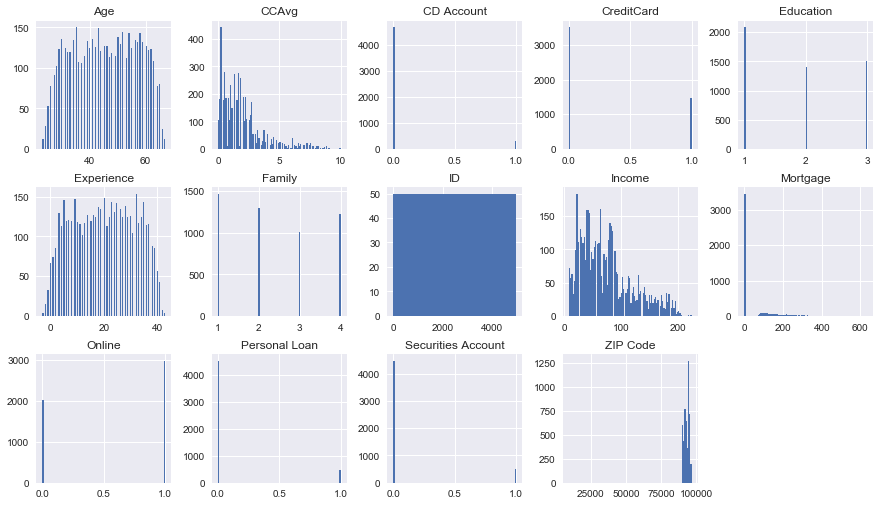

In [413]:
loan_df.hist(bins=100, figsize=(15,30), layout=(10,5));

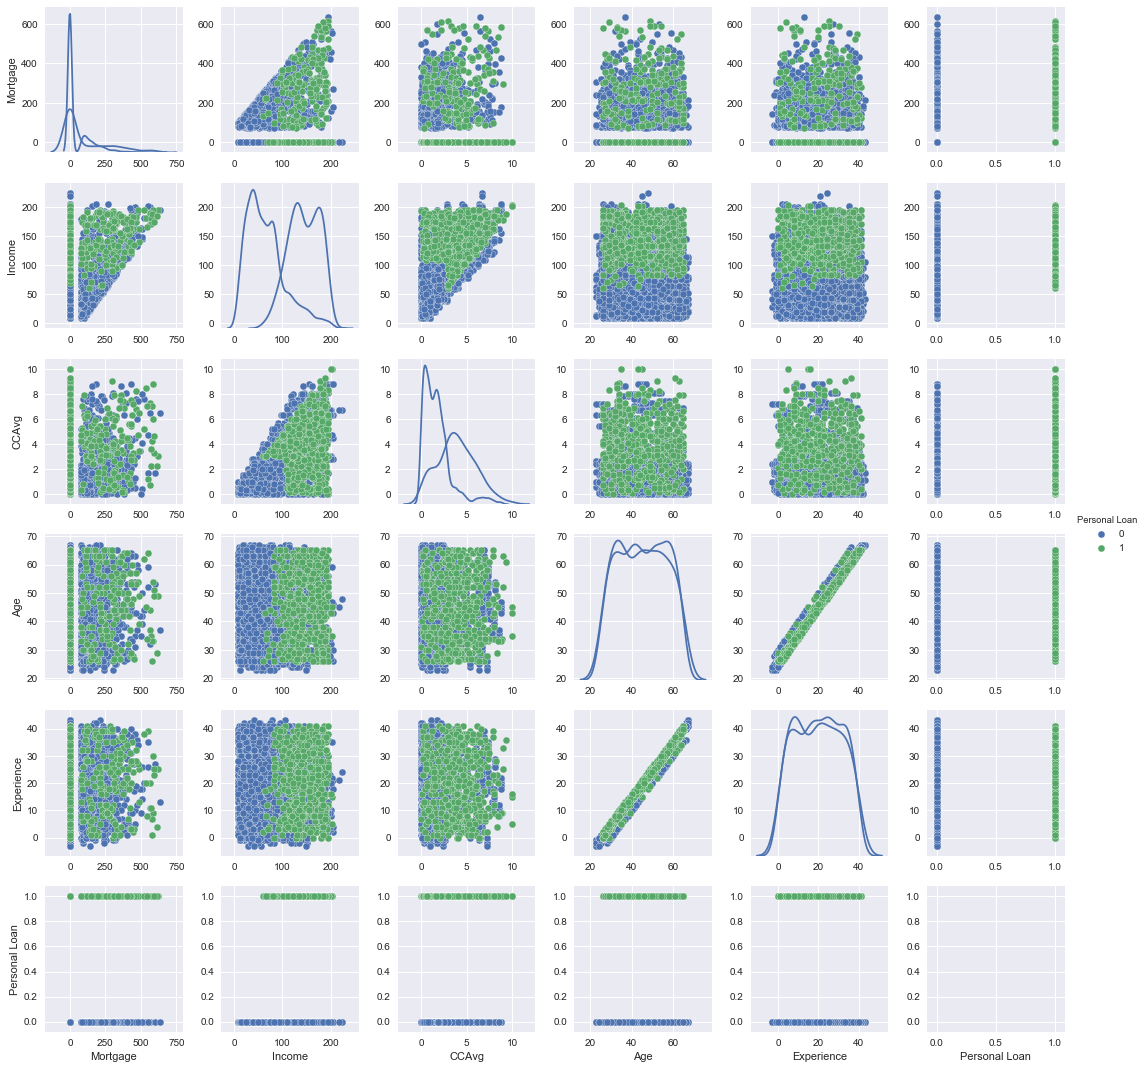

In [382]:
sns.pairplot(loan_df[['Mortgage', 'Income', 'CCAvg', 'Age','Experience','Personal Loan']], hue='Personal Loan', diag_kind='kde')

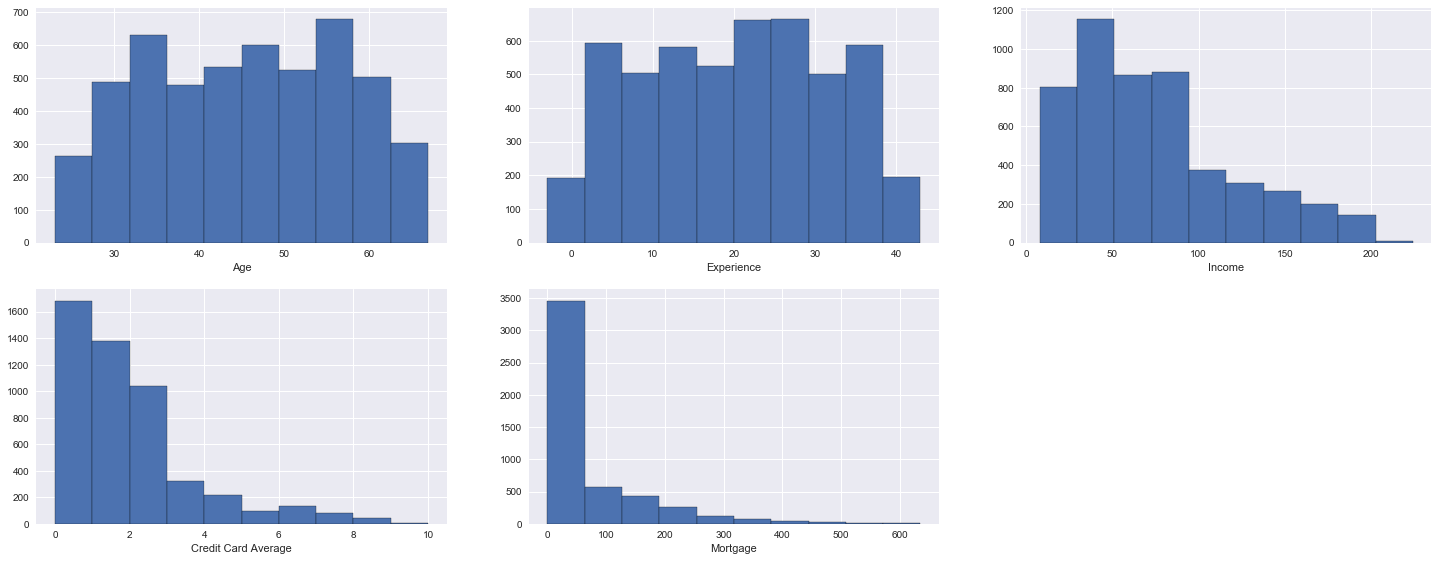

In [383]:
plt.figure(figsize= (25,25))
plt.subplot(5,3,1)
plt.hist(loan_df.Age,edgecolor = 'black')
plt.xlabel('Age')

plt.subplot(5,3,2)
plt.hist(loan_df.Experience,edgecolor = 'black')
plt.xlabel('Experience')

plt.subplot(5,3,3)
plt.hist(loan_df.Income,edgecolor = 'black')
plt.xlabel('Income')

plt.subplot(5,3,4)
plt.hist(loan_df.CCAvg,edgecolor = 'black')
plt.xlabel('Credit Card Average')

plt.subplot(5,3,5)
plt.hist(loan_df.Mortgage, edgecolor = 'black')
plt.xlabel('Mortgage')

plt.show()

**Observation**

   - Age & Experience are normally distributed

   - Income, CC Average & Mortgage are highly skewed


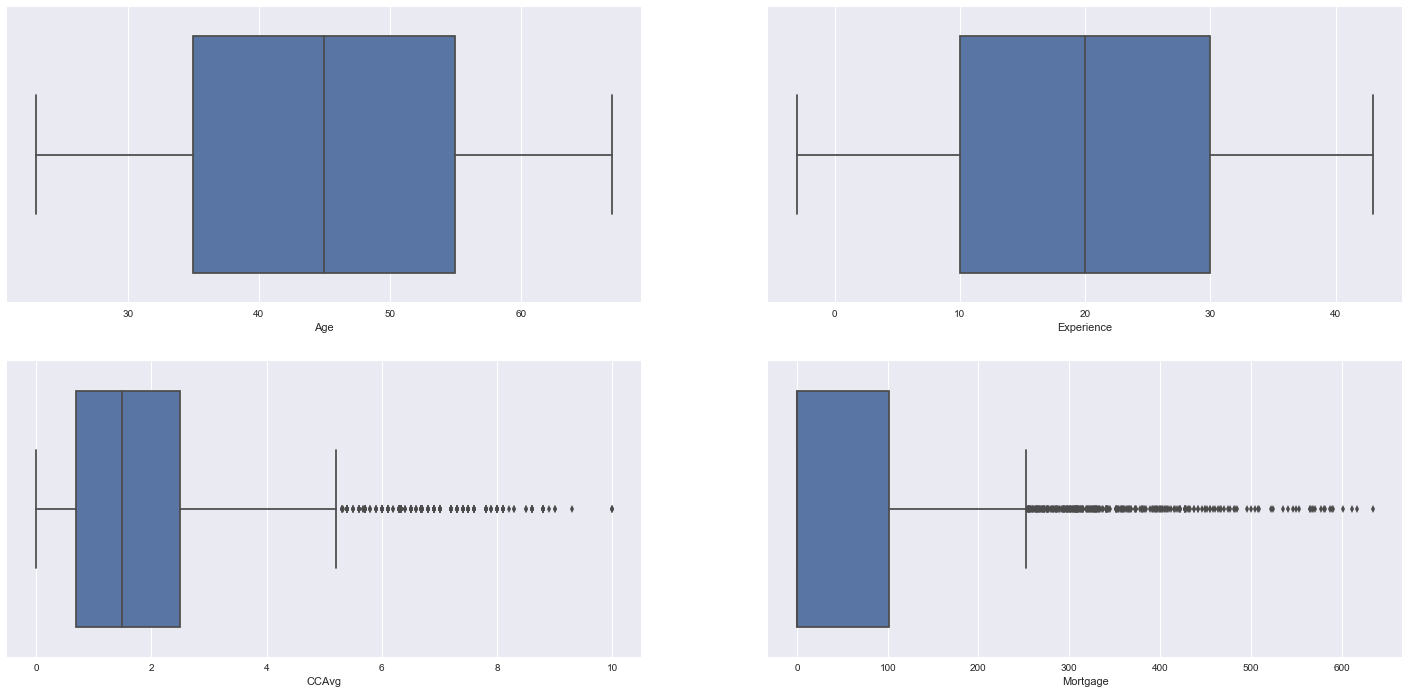

In [407]:
plt.figure(figsize= (25,25))
plt.subplot(4,2,1)
sns.boxplot(x= loan_df.Age)

plt.subplot(4,2,2)
sns.boxplot(x= loan_df.Experience)

plt.subplot(4,2,3)
sns.boxplot(x= loan_df.CCAvg)

plt.subplot(4,2,4)
sns.boxplot(x= loan_df.Mortgage)

** Observation **
- Majority of customers are between 35 years and 55 years of age. 
- Most customer having experience between 10 - 30 Years. 
- CCAvg is also positively skewed and average spending is between 0-10K.
- Mojority of the customers have a less mortgage. However the maximum value ranges around 600K. Again a highly skewed varible.


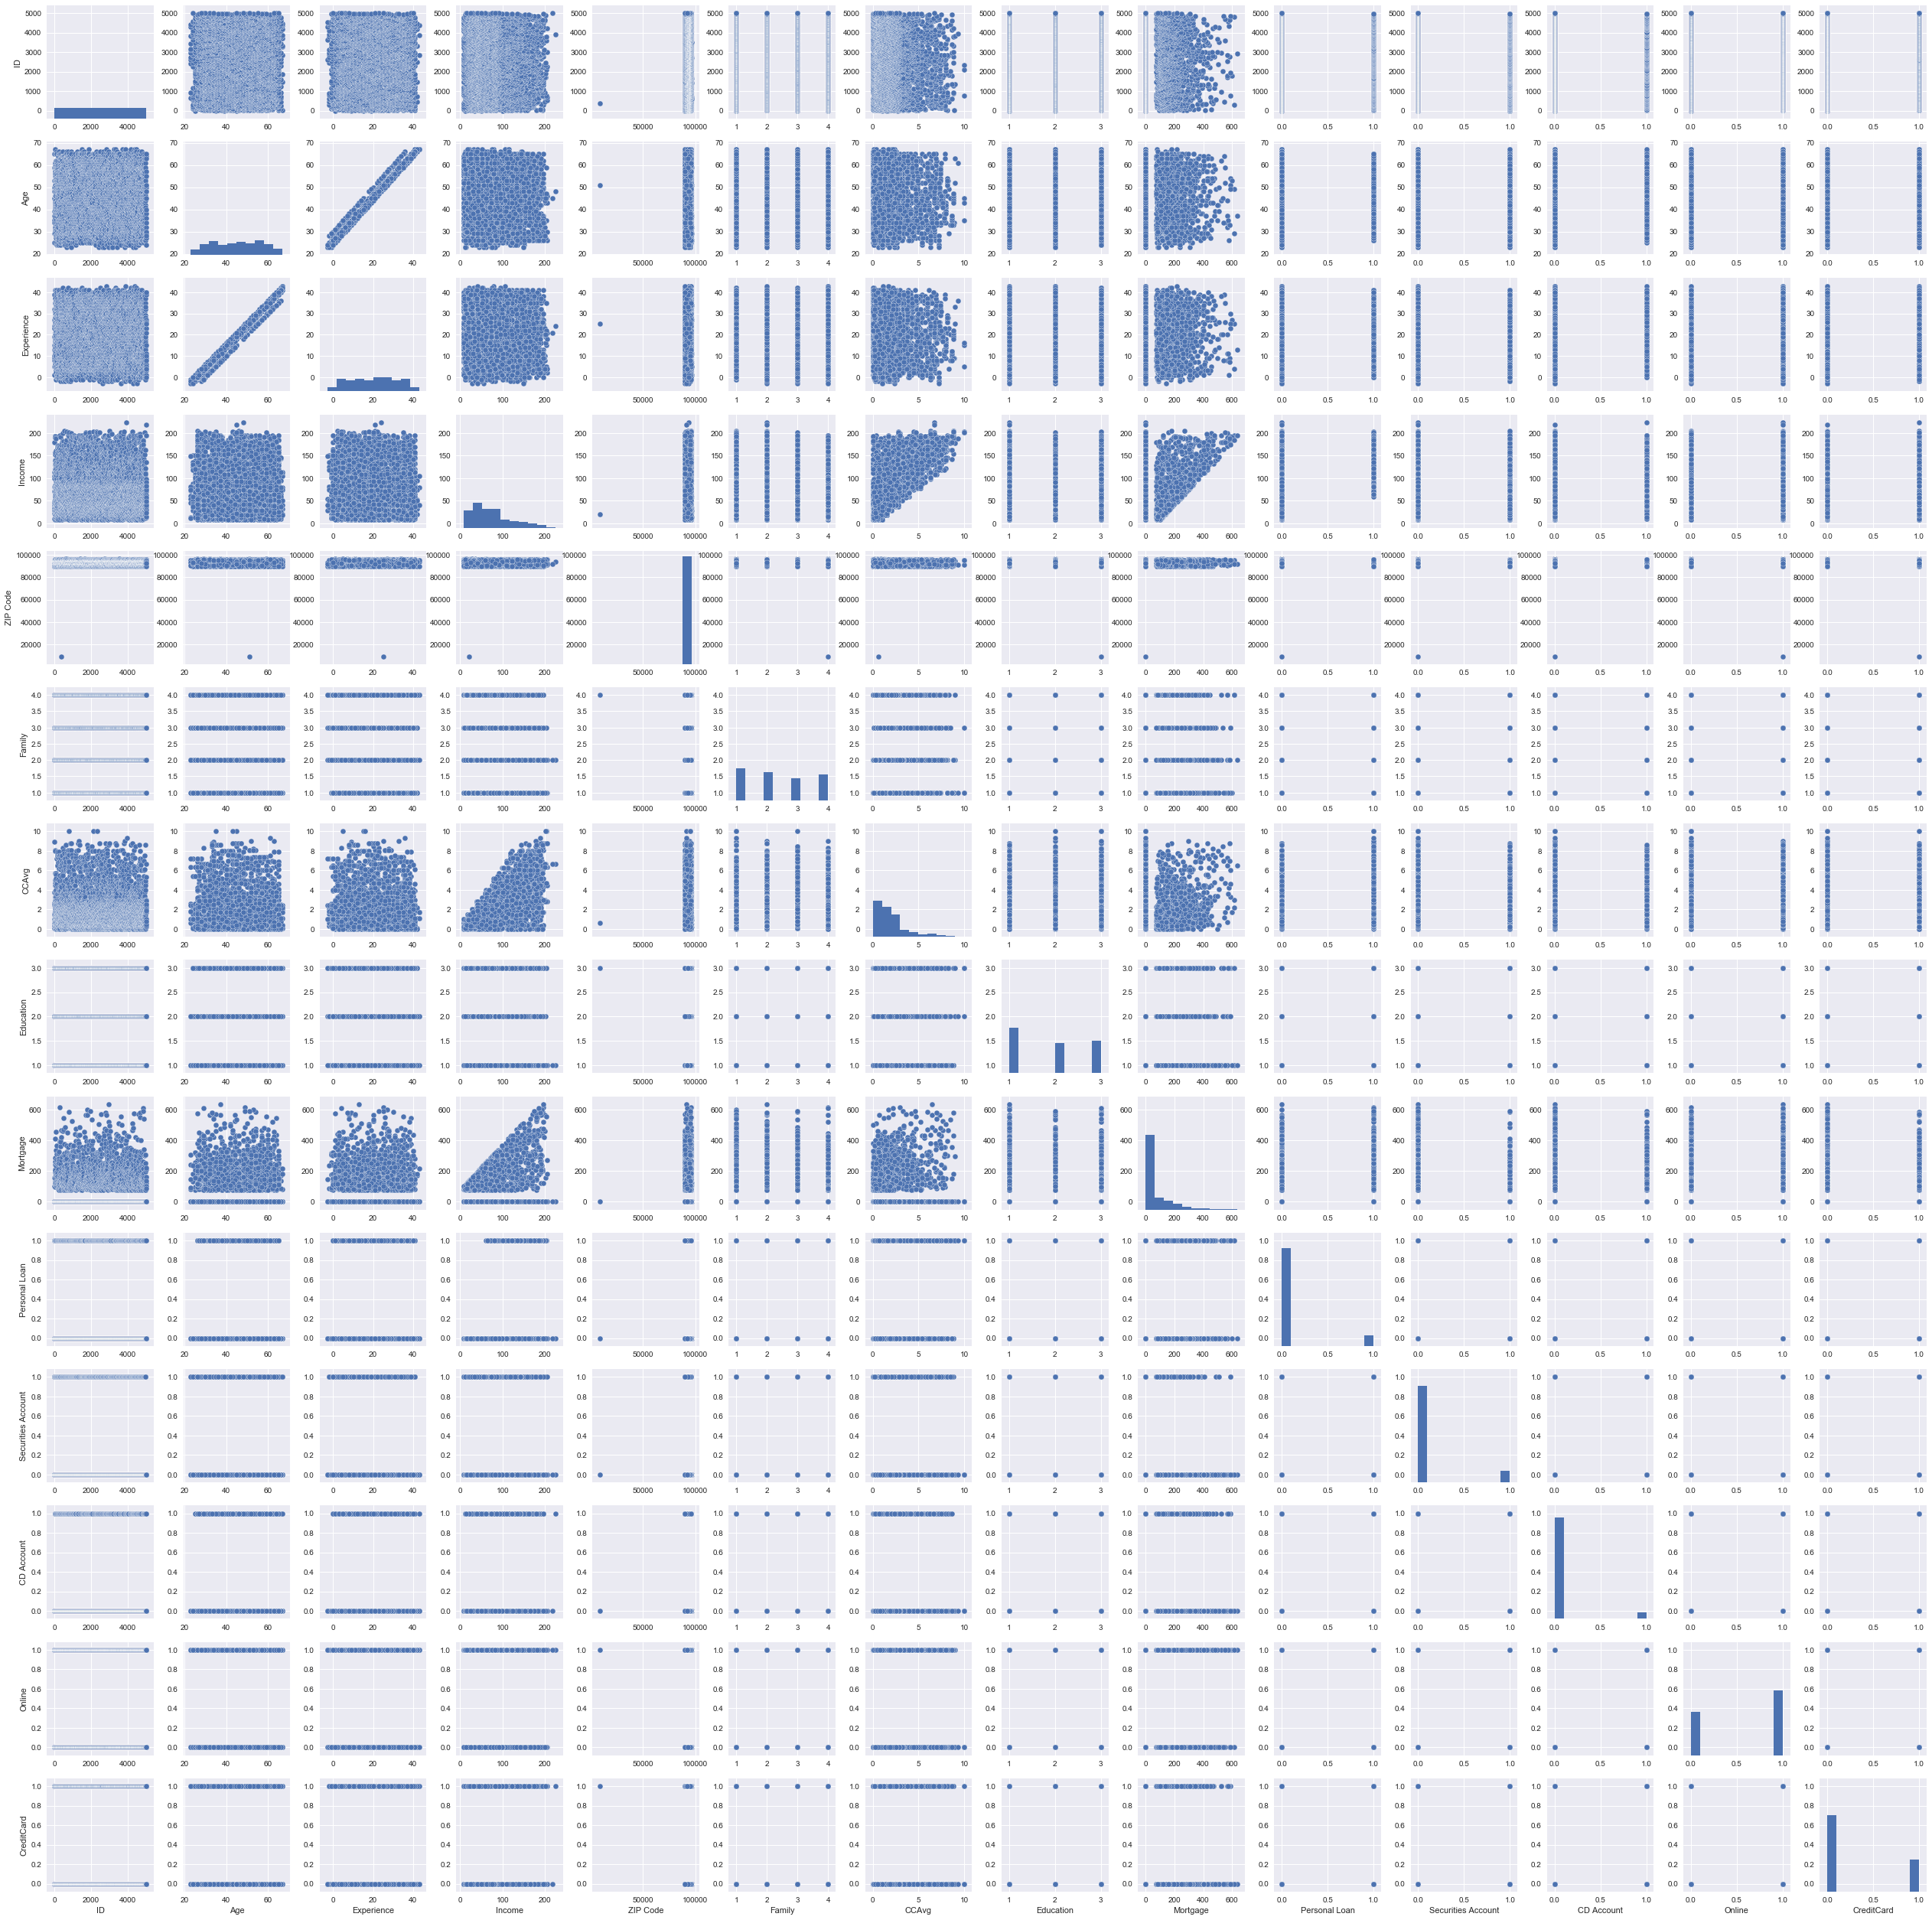

In [385]:
sns.pairplot(loan_df)
plt.show()

**Studying the effect of Family, Age, and Education on Personal loan**

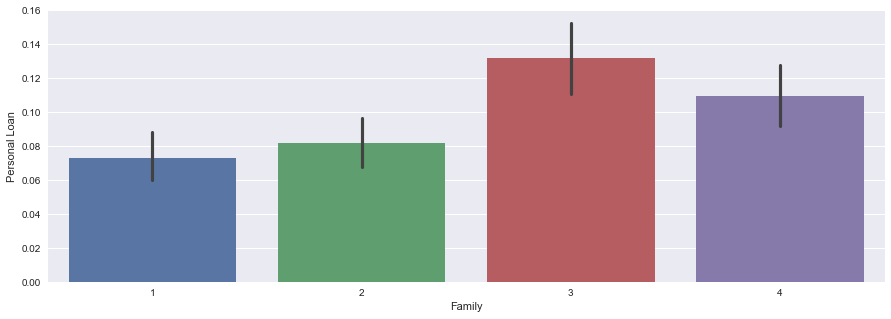

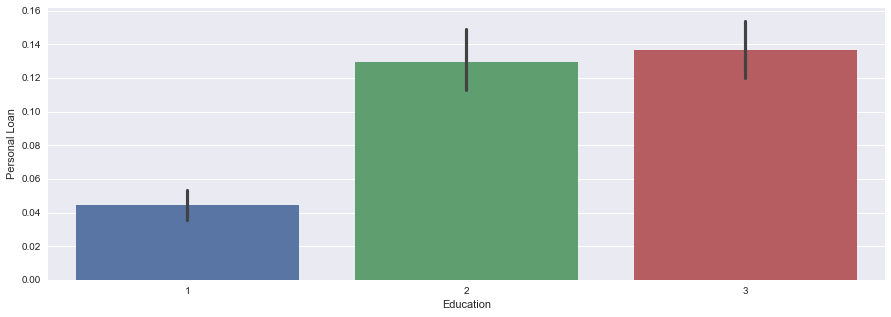

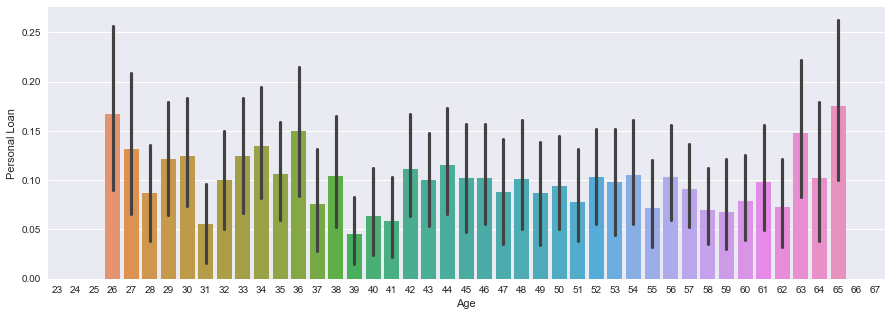

In [405]:
plt.figure(figsize=(15,5)) 
plot = sns.barplot(x='Family', y='Personal Loan', data=loan_df)

plt.figure(figsize=(15,5)) 
plot = sns.barplot(x='Education', y='Personal Loan', data=loan_df)

plt.figure(figsize=(15,5)) 
plot = sns.barplot(x='Age', y='Personal Loan', data=loan_df)

**Observation**
- Families of size>3 are more prone to take a loan
- People with education level of graduation or higher are more prone to taking a loan.
- Age has almost no affect on loan as we can see every age group has applied for the loan

In [387]:
loan_df[['Age','Experience', 'Income', 'CCAvg', 'Mortgage','Personal Loan']].corr()

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan
Age,1.000000,0.994215,-0.055269,-0.052012,-0.012539,-0.007726
Experience,0.994215,1.000000,-0.046574,-0.050077,-0.010582,-0.007413
Income,-0.055269,-0.046574,1.000000,0.645984,0.206806,0.502462
CCAvg,-0.052012,-0.050077,0.645984,1.000000,0.109905,0.366889
Mortgage,-0.012539,-0.010582,0.206806,0.109905,1.000000,0.142095
Personal Loan,-0.007726,-0.007413,0.502462,0.366889,0.142095,1.000000


**Income and CCAvg has higer correlation with Personal loan as seen in above table**
**Age and Experience are highly co-related**

# Get data model  ready

- We will drop the ID and Zip Code column as it is not effective in modelling.
- As we have seen earlier that Age and Experience are highly corelated, so we will drop Experience column as it also had some negative values.

In [388]:
new_loan_df=loan_df.drop(['ID','ZIP Code','Experience'],axis=1)

In [389]:
# Transforming the categorical variables Family, Education, Securities Account, CD Account, Online, and CreditCard to numerical
new_loan_df= pd.get_dummies(new_loan_df, columns=['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard'])


In [390]:
new_loan_df.head()

,Age,Income,CCAvg,Mortgage,Personal Loan,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1
0,25,49,1.6,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,1,0
1,45,34,1.5,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0
2,39,11,1.0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0
3,35,100,2.7,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0
4,35,45,1.0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1


In [391]:
new_loan_df.shape

(5000, 20)

# Splitting the data

In [392]:
X = new_loan_df.drop(['Personal Loan'], axis=1)
y = new_loan_df[['Personal Loan']]

In [393]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [394]:
X_test.head()

,Age,Income,CCAvg,Mortgage,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1
2764,31,84,2.9,105,1,0,0,0,0,0,1,1,0,1,0,1,0,0,1
4767,35,45,0.9,101,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0
3814,34,35,1.3,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0
3499,49,114,0.3,286,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0
2735,36,70,2.6,165,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0


# Logistic Regression Modelling

In [395]:
model = LogisticRegression(random_state=456789123,fit_intercept=False)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

In [396]:
model_score = model.score(X_test, y_test)
print('Model Accuracy score is:',model_score)

Model Accuracy score is: 0.955333333333


In [397]:
accuracy=accuracy_score(y_test,y_predict)
print('Accuracy of the model is:', accuracy)

recall = metrics.recall_score(y_test, y_predict)
print('Recall of the model is: ', recall)

precision = metrics.precision_score(y_test, y_predict)
print('Precision of the model is: ', precision)

f1_score = f1_score(y_test,y_predict)
print('F1 Score of the model is: ',f1_score)

roc_auc_score = roc_auc_score(y_test,y_predict)
print('ROC_AUC score of the model is: ',roc_auc_score)

Accuracy of the model is: 0.955333333333
Recall of the model is:  0.61744966443
Precision of the model is:  0.901960784314
F1 Score of the model is:  0.733067729084
ROC_AUC score of the model is:  0.805023869965


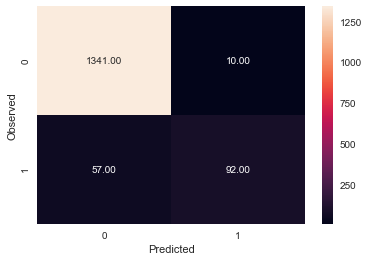

None


In [398]:
## function to get confusion matrix in a proper format. This function is taken directly form the course material.
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

print(draw_cm(y_test, y_predict))

In [399]:
co_eff = pd.DataFrame()
co_eff['Col'] = X_train.columns
co_eff['Coeff'] = np.round(abs(model.coef_[0]),2)
co_eff.sort_values(by='Coeff',ascending=False)

,Col,Coeff
8,Education_1,3.42
13,CD Account_0,3.17
18,CreditCard_1,1.94
12,Securities Account_1,1.90
16,Online_1,1.78
4,Family_1,1.67
5,Family_2,1.64
15,Online_0,1.25
11,Securities Account_0,1.13
17,CreditCard_0,1.08


In [400]:
modelled_data = X_test.copy()
modelled_data['Observed Loan Status'] = y_test
modelled_data['Predicted Loan Status'] = y_predict
modelled_data.head()

,Age,Income,CCAvg,Mortgage,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,...,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1,Observed Loan Status,Predicted Loan Status
2764,31,84,2.9,105,1,0,0,0,0,0,...,1,0,1,0,1,0,0,1,0,0
4767,35,45,0.9,101,0,0,1,0,1,0,...,0,1,1,0,1,0,1,0,0,0
3814,34,35,1.3,0,0,0,1,0,1,0,...,1,0,1,0,1,0,1,0,0,0
3499,49,114,0.3,286,1,0,0,0,1,0,...,1,0,1,0,0,1,1,0,0,0
2735,36,70,2.6,165,0,0,1,0,0,1,...,1,0,1,0,0,1,1,0,0,0


In [401]:
filt=(modelled_data['Observed Loan Status']!=modelled_data['Predicted Loan Status'])
modelled_data[filt]

,Age,Income,CCAvg,Mortgage,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,...,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1,Observed Loan Status,Predicted Loan Status
932,51,112,1.80,0,0,0,1,0,0,1,...,0,1,0,1,0,1,0,1,0,1
3347,65,78,2.00,0,0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,1
3988,59,85,3.40,0,1,0,0,0,0,0,...,1,0,0,1,1,0,0,1,1,0
3271,52,93,4.10,0,0,0,0,1,0,1,...,1,0,1,0,1,0,0,1,1,0
349,26,60,3.00,132,0,1,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
927,65,95,3.70,138,0,0,1,0,0,1,...,1,0,1,0,1,0,0,1,1,0
2968,44,162,1.30,301,0,0,0,1,1,0,...,1,0,1,0,1,0,1,0,1,0
1518,43,64,3.00,221,0,0,0,1,0,0,...,1,0,1,0,0,1,1,0,1,0
1552,29,195,4.30,0,1,0,0,0,1,0,...,1,0,1,0,1,0,1,0,0,1
2784,36,115,2.20,0,0,0,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0


**There are 67 instances where predicted value is not equal to observed value**

# Business understanding of the model

This case study  is aboutThera Bank whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

We tried to creat a ML model to predict the probablity of the customers who are more likely to take the loan based on some criterias like age, education, experience etc so that bank can target more potential customers and increase its conversion rate.

We built a logistic regression model and calculated various stats of the model to getan idea of model effectiveness.
We get the following stats for the model which seems to be satisfactory.

Accuracy of the model is: 0.955333333333
Recall of the model is:  0.61744966443
Precision of the model is:  0.901960784314
F1 Score of the model is:  0.733067729084
ROC_AUC score of the model is:  0.805023869965

However there are 67 instances where model prediction was not correct on tets data.
